
--------------------------------------------------
Logistic Regression report with details : 

              precision    recall  f1-score   support

 Non-Dropout       0.88      0.94      0.91       671
     Dropout       0.78      0.61      0.68       226

    accuracy                           0.86       897
   macro avg       0.83      0.78      0.80       897
weighted avg       0.85      0.86      0.85       897

The accuracy of Logistic Regression: 0.8573021181716833 (85.73%)

--------------------------------------------------
SVC report with details : 

              precision    recall  f1-score   support

 Non-Dropout       0.89      0.96      0.93       671
     Dropout       0.85      0.66      0.74       226

    accuracy                           0.89       897
   macro avg       0.87      0.81      0.84       897
weighted avg       0.88      0.89      0.88       897

The accuracy of SVC: 0.8851727982162765 (88.52%)
Best kernel: rbf

--------------------------------------

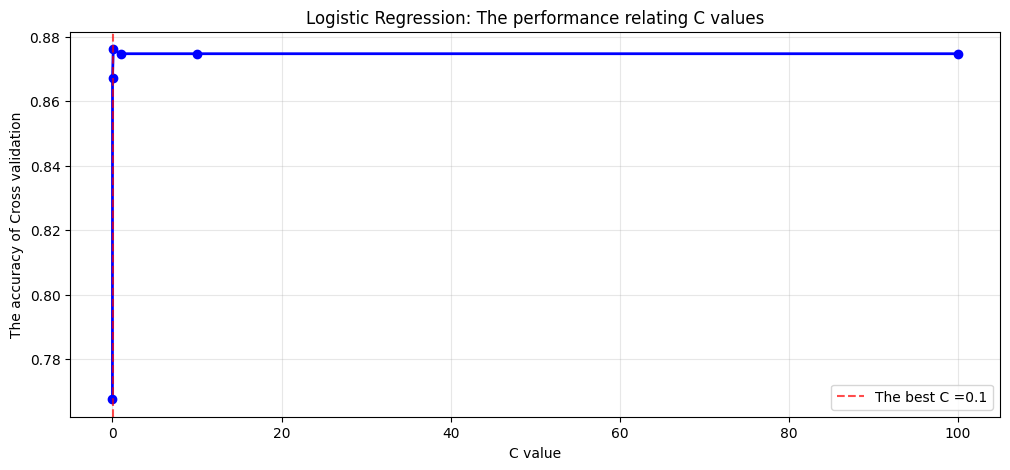

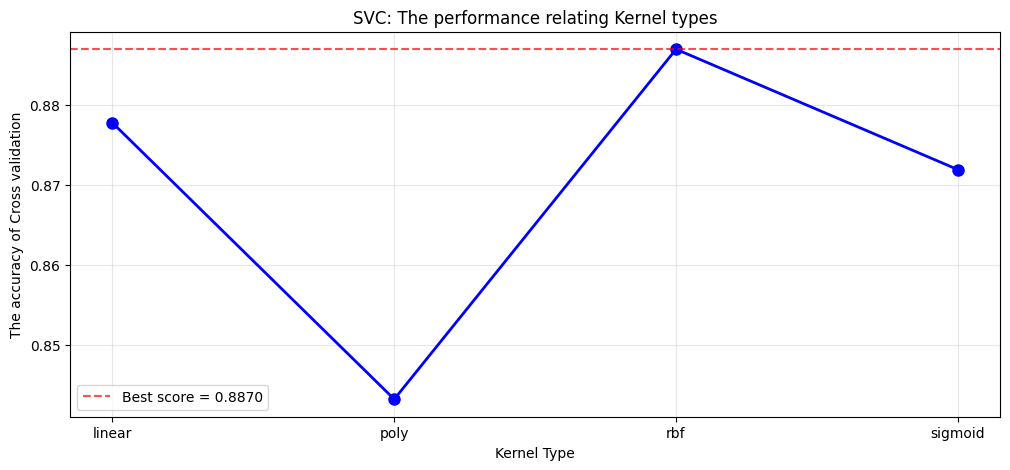

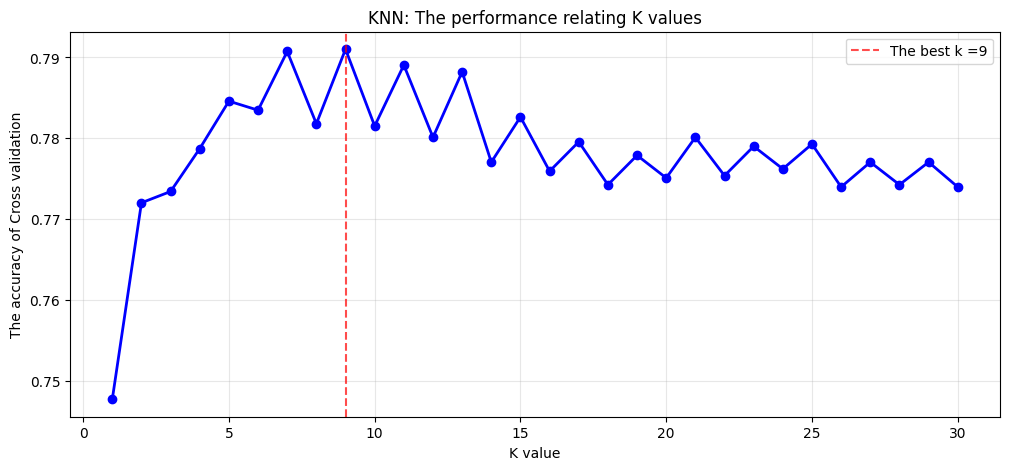

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('https://raw.githubusercontent.com/Salina-Huang/AI-in-ED-Multi-dimensional-Student-analytics-for-dropout-risk-prediction/refs/heads/main/Preparation_data_onehot.csv')

X = data.drop('dropout_status', axis=1)
y = data['dropout_status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.2,random_state=42)
target_names = ['Non-Dropout', 'Dropout']

# Logistic Regression Model
C_range = [0.001, 0.01, 0.1, 1, 10, 100]
logistic_scores_final = []
for C in C_range:
  logistic_model = LogisticRegression(random_state=42, max_iter=1000, C=C)
  logistic_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
  logistic_scores_final.append(logistic_scores.mean())

best_C = C_range[np.argmax(logistic_scores_final)]
best_C_scores = max(logistic_scores_final)

best_logistic_model = LogisticRegression(random_state=42, max_iter=1000, C=best_C)
best_logistic_model.fit(X_train, y_train)

plt.figure(figsize=(12,5))
plt.plot(C_range, logistic_scores_final, 'bo-', linewidth=2, markersize=6)
plt.axvline(x=best_C, color='red', linestyle='--', alpha=0.7, label=f'The best C ={best_C}')
plt.xlabel('C value')
plt.ylabel('The accuracy of Cross validation')
plt.title('Logistic Regression: The performance relating C values')
plt.grid(True, alpha=0.3)
plt.legend()

best_logistic_predict = best_logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, best_logistic_predict)

print('\n' + '-'*50)
print('Logistic Regression report with details : ' + '\n')
print(classification_report(y_test, best_logistic_predict, target_names=target_names))
print(f'The accuracy of Logistic Regression: {logistic_accuracy} ({logistic_accuracy*100:.2f}%)')

# SVC Model
from sklearn.svm import SVC

svc_range = ['linear', 'poly', 'rbf', 'sigmoid']
svc_scores_final = []
for kernel in svc_range:
  SVC_model = SVC(random_state=42, kernel=kernel)
  svc_scores = cross_val_score(SVC_model, X_train, y_train, cv=5, scoring='accuracy')
  svc_scores_final.append(svc_scores.mean())

best_kernel = svc_range[np.argmax(svc_scores_final)]
best_kernel_scores = max(svc_scores_final)

best_svc_model = SVC(random_state=42, kernel=best_kernel)
best_svc_model.fit(X_train, y_train)

plt.figure(figsize=(12,5))
plt.plot(svc_range, svc_scores_final, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=best_kernel_scores, color='red', linestyle='--', alpha=0.7, label=f'Best score = {best_kernel_scores:.4f}')
plt.xlabel('Kernel Type')
plt.ylabel('The accuracy of Cross validation')
plt.title('SVC: The performance relating Kernel types')
plt.grid(True, alpha=0.3)
plt.legend()

best_svc_predict = best_svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, best_svc_predict)

print('\n' + '-'*50)
print('SVC report with details : ' + '\n')
print(classification_report(y_test, best_svc_predict, target_names=target_names))
print(f'The accuracy of SVC: {svc_accuracy} ({svc_accuracy*100:.2f}%)')
print(f'Best kernel: {best_kernel}')



#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_range = range(1,31)
temp = 0
knn_scores_final = []
for i in knn_range:
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring = 'accuracy')
  knn_scores_final.append(knn_scores.mean())

best_k = knn_range[np.argmax(knn_scores_final)]
best_k_scores = max(knn_scores_final)

best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

plt.figure(figsize=(12,5))
plt.plot(knn_range, knn_scores_final, 'bo-', linewidth = 2, markersize=6)
plt.axvline(x=best_k,color ='red', linestyle='--', alpha=0.7,label=f'The best k ={best_k}')
plt.xlabel('K value')
plt.ylabel('The accuracy of Cross validation')
plt.title('KNN: The performance relating K values')
plt.grid(True, alpha=0.3)
plt.legend()

best_knn_predict = best_knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, best_knn_predict)

print('\n'+ '-'*50)
print('KNN report with details : '+'\n')
print(classification_report(y_test,best_knn_predict, target_names=target_names))
print(f'The accuracy of KNN: {knn_accuracy} ({knn_accuracy*100:.2f}%)')